### COO Assessment 2 - Question 1

- We are given the Prisoner's Dilemma as a Bargaining Problem
- The Prisoners’ Dilemma is a famous model for illustrating the conflict between social cooperation and self-interested behavior.
- We first import the necessary packages needed for this problem

In [8]:
# Import the libraries
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Consider a two player Prisoners’ Dilemma.
- The cooperative payoff possibilities are mathematically described by a polytope which is defined
as the convex hull of the payoff vectors (4,4), (6,0), (0,6) and (0,0).
- We plot this convex hull for the problem below

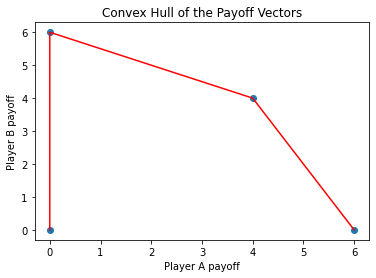

In [9]:
# We are going to model the Prisoner's Dilemma game using CVXPY
# The game is played between two players, A and B
# We are given that cooperative payoff possibilities are mathematically described by a polytope which is defined as the convex hull of the payoff vectors (4,4), (6,0), (0,6) and (0,0).

# Define the payoff vectors
payoff_vectors = np.array([[4,4],[6,0],[0,6],[0,0]])

# Define the convex hull of the payoff vectors
convex_hull = np.array([[0,0],[0,6],[4,4],[6,0]])

# Plot the payoff vectors and the convex hull
plt.plot(payoff_vectors[:,0], payoff_vectors[:,1], 'o')
plt.plot(convex_hull[:,0], convex_hull[:,1], 'r-')
plt.xlabel('Player A payoff')
plt.ylabel('Player B payoff')
plt.title('Convex Hull of the Payoff Vectors')
plt.show()

- We think of the Prisoner's Dilemma as a Bargaining situation with the disagreement point as $d = (d_1, d_2)$

- The notion of a disagreement point introduces a constraint that player $i$ cannot get a payoff below her disagreement point payoff $d_i$

- Upon modelling this situation given to us, we are presented with the following constraints:
$$
u_1 + 2u_2 \leq 12
$$
$$
u_2 + 2u_1 \leq 12
$$
$$
u_1 \geq d_1
$$
$$
u_2 \geq d_2
$$

- where $(u_1, u_2)$ is the payoff vectors for the two players in the bargaining situation.
- The constraints given above define the feasible set ($F$) for our constrained optimisation problem which we are going to solve in the forthcoming questions.

#### Question 1

- In this question, keeping the feasible set the same we need to maximise the Weighted Utilitarian Criterion function given by:
$$
W(u_1, u_2) = \theta u_1 + (1-\theta)u_2  
$$
$$
where \space \theta \in [0,1]
$$
- The weighted utilitarian solution (i.e. our Objective Function) is given by:
$$
\max_{(u_1, u_2)} W(u_1, u_2)
$$
$$
such \space that \space (u_1, u_2) \in F
$$

- The disagreement point given to us is:
$$
(d_1, d_2) = (3.5, 2)
$$

- First we use the CVXPY library to define the variables $u_1$ and $u_2$

In [10]:
# Define the variables
u1 = cp.Variable()
u2 = cp.Variable()

- Next we define the feasible set by adding the constraints to a list

In [11]:
# Feasible set for payoff vectors (u1, u2) for the problem is given as the inequalities:
# u1 + 2u2 <= 12
# 2u1 + u2 <= 12
# u1 >= d1, u2 >= d2
# where d1 and d2 are the minimum payoffs for each player d = (d1, d2) is the disagreement point
# d = (3.5, 2) is the disagreement point given in the problem to us

# Define the constraints
constraints = [u1 + 2*u2 <= 12, 2*u1 + u2 <= 12, u1 >= 3.5, u2 >= 2]

- Next we define the Weighted Utilitarian Criterion function given by:
$$
W(u_1, u_2) = \theta u_1 + (1-\theta)u_2  
$$
$$
where \space \theta \in [0,1]
$$

- We set the value of $\theta$ as non-negative as it lies between 0 and 1.

In [12]:
# The weighted utilarian criterion is given as:
# W(u1, u2) = theta*u1 + (1-theta)*u2 where theta is in [0,1]
# We need to maximize the weighted utilarian criterion

# Define the weighted utilarian criterion
theta = cp.Parameter(nonneg=True)
weighted_utilarian_criterion = theta*u1 + (1-theta)*u2

- We define our objective function as:
$$
\max_{(u_1, u_2)} W(u_1, u_2)
$$
$$
such \space that \space (u_1, u_2) \in F
$$

In [13]:
# Define the objective function
objective = cp.Maximize(weighted_utilarian_criterion)

# Define the problem
problem = cp.Problem(objective, constraints)

- In this question, we are required to plot Player 1's utilitarian optimum $u_{1}(\theta)$ as the value of $\theta$ varies $\in [0, 1]$

- We define a range of theta and solve the above constructed above for each value of $\theta$ between 0 and 1.
- We store the corresponding values of $u_1$ and $u_2$ in a list.
- We then simply plot the variation of $u_{1}(\theta)$  with $\theta$ in the plot below

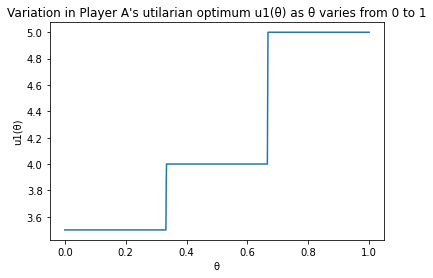

In [14]:
# Define the range of theta
theta_range = np.linspace(0,1,1000)

# Define the feasible set
feasible_set = np.zeros((len(theta_range),2))

# Solve the problem for each value of theta
for i in range(len(theta_range)):
    theta.value = theta_range[i]
    problem.solve()
    feasible_set[i,0] = u1.value
    feasible_set[i,1] = u2.value

# Plot Player A's utilarian optimum u1(theta) as theta varies from 0 to 1
plt.plot(theta_range, feasible_set[:,0])
plt.xlabel('θ')
plt.ylabel('u1(θ)')
plt.title('Variation in Player A\'s utilarian optimum u1(θ) as θ varies from 0 to 1')
plt.show()
